In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
# Reading password
secrets_file = open("secrets.txt","r")
string = secrets_file.read()
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1]

In [3]:
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
client_secret=secrets_dict['csecret']))

In [5]:
data = pd.read_csv('../data/songs90k.csv')

In [6]:
data

,title,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,Hits 2020 - Mashup,"Trinix Remix, Trinix",spotify:track:45v4pDxE0VuSZOx81FtgBS,0.510,0.709,1.0,-7.194,0.0,0.1620,0.12800,0.000015,0.0653,0.6620,142.510,audio_features,45v4pDxE0VuSZOx81FtgBS,https://api.spotify.com/v1/tracks/45v4pDxE0VuS...,https://api.spotify.com/v1/audio-analysis/45v4...,133591.0,5.0
1,As It Was,Harry Styles,spotify:track:4LRPiXqCikLlN15c3yImP7,0.520,0.731,6.0,-5.338,0.0,0.0557,0.34200,0.001010,0.3110,0.6620,173.930,audio_features,4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303.0,4.0
2,About Damn Time,Lizzo,spotify:track:1PckUlxKqWQs3RlWXVBLw3,0.836,0.743,10.0,-6.305,0.0,0.0656,0.09950,0.000000,0.3350,0.7220,108.966,audio_features,1PckUlxKqWQs3RlWXVBLw3,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822.0,4.0
3,Alone Again,The Weeknd,spotify:track:2geUtMB7UX968R11pCoXbU,0.256,0.653,6.0,-7.972,0.0,0.0544,0.03370,0.113000,0.1680,0.0581,90.673,audio_features,2geUtMB7UX968R11pCoXbU,https://api.spotify.com/v1/tracks/2geUtMB7UX96...,https://api.spotify.com/v1/audio-analysis/2geU...,250057.0,5.0
4,Too Late,The Weeknd,spotify:track:6BSAGCfWNAlx4dVlvxx9UT,0.640,0.869,4.0,-5.179,0.0,0.1170,0.05180,0.000119,0.6910,0.1850,120.070,audio_features,6BSAGCfWNAlx4dVlvxx9UT,https://api.spotify.com/v1/tracks/6BSAGCfWNAlx...,https://api.spotify.com/v1/audio-analysis/6BSA...,239980.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83722,Sunny Afternoon,Red Velvet,spotify:track:3G6iqKcRzEYwSu9zE2qAMW,0.747,0.841,4.0,-3.648,0.0,0.0787,0.08440,0.000000,0.3800,0.6050,95.028,audio_features,3G6iqKcRzEYwSu9zE2qAMW,https://api.spotify.com/v1/tracks/3G6iqKcRzEYw...,https://api.spotify.com/v1/audio-analysis/3G6i...,240405.0,4.0
83723,Fool,Red Velvet,spotify:track:21C7B7PWYDW00czamOjleO,0.634,0.699,1.0,-3.898,1.0,0.1090,0.52700,0.000060,0.0673,0.7740,177.941,audio_features,21C7B7PWYDW00czamOjleO,https://api.spotify.com/v1/tracks/21C7B7PWYDW0...,https://api.spotify.com/v1/audio-analysis/21C7...,233540.0,4.0
83724,Some Love,Red Velvet,spotify:track:5n8SuNZuDaElJQMt0ySzCf,0.744,0.907,7.0,-3.154,1.0,0.0567,0.06490,0.000685,0.2720,0.7460,99.988,audio_features,5n8SuNZuDaElJQMt0ySzCf,https://api.spotify.com/v1/tracks/5n8SuNZuDaEl...,https://api.spotify.com/v1/audio-analysis/5n8S...,196818.0,4.0
83725,My Dear,Red Velvet,spotify:track:6s25gIYsBc8oF0VQFK7wzt,0.550,0.798,6.0,-2.681,1.0,0.1310,0.32700,0.000000,0.0905,0.8470,201.965,audio_features,6s25gIYsBc8oF0VQFK7wzt,https://api.spotify.com/v1/tracks/6s25gIYsBc8o...,https://api.spotify.com/v1/audio-analysis/6s25...,214842.0,4.0


# Choosing K

In [7]:
X = data.loc[:,'danceability':'time_signature'].drop(['id','track_href','type','analysis_url'],axis=1)

In [8]:
# Minmaxing
from sklearn.preprocessing import MinMaxScaler 
transformer = MinMaxScaler().fit(X)
X_prep = transformer.transform(X)
X_prep = pd.DataFrame(X_prep, columns=X.columns)

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

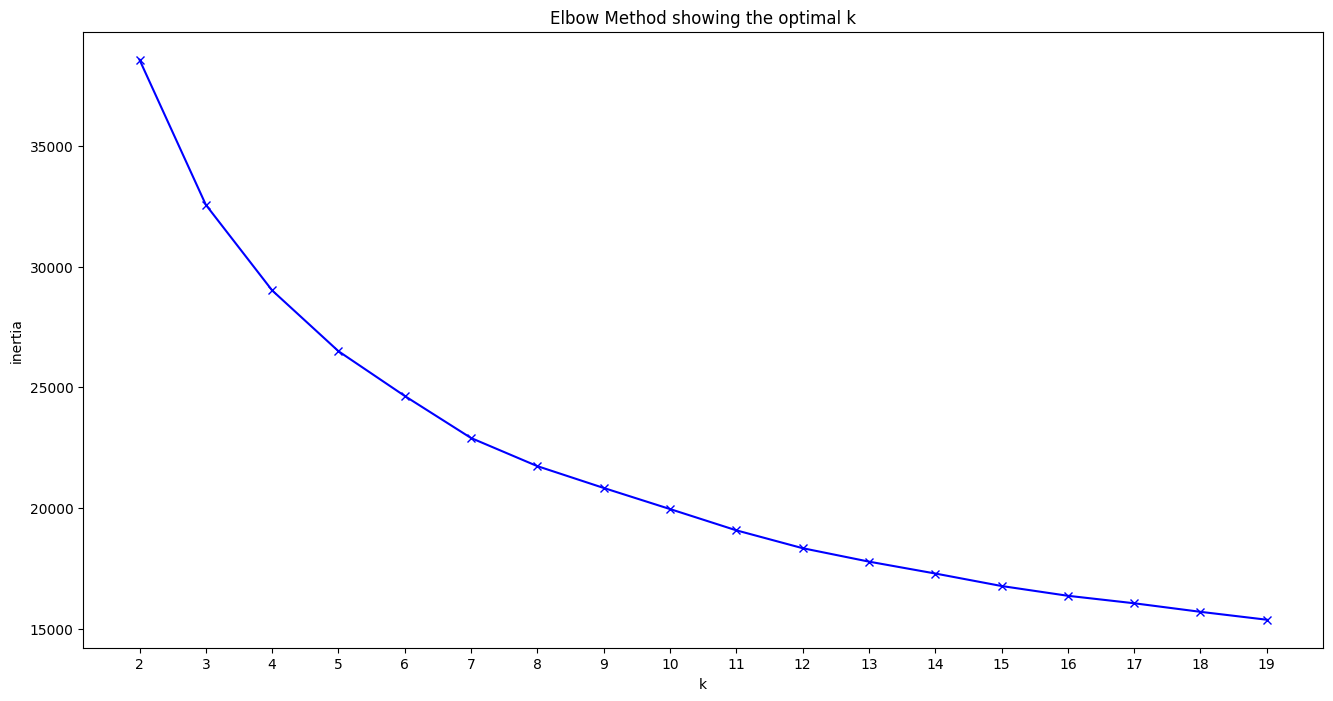

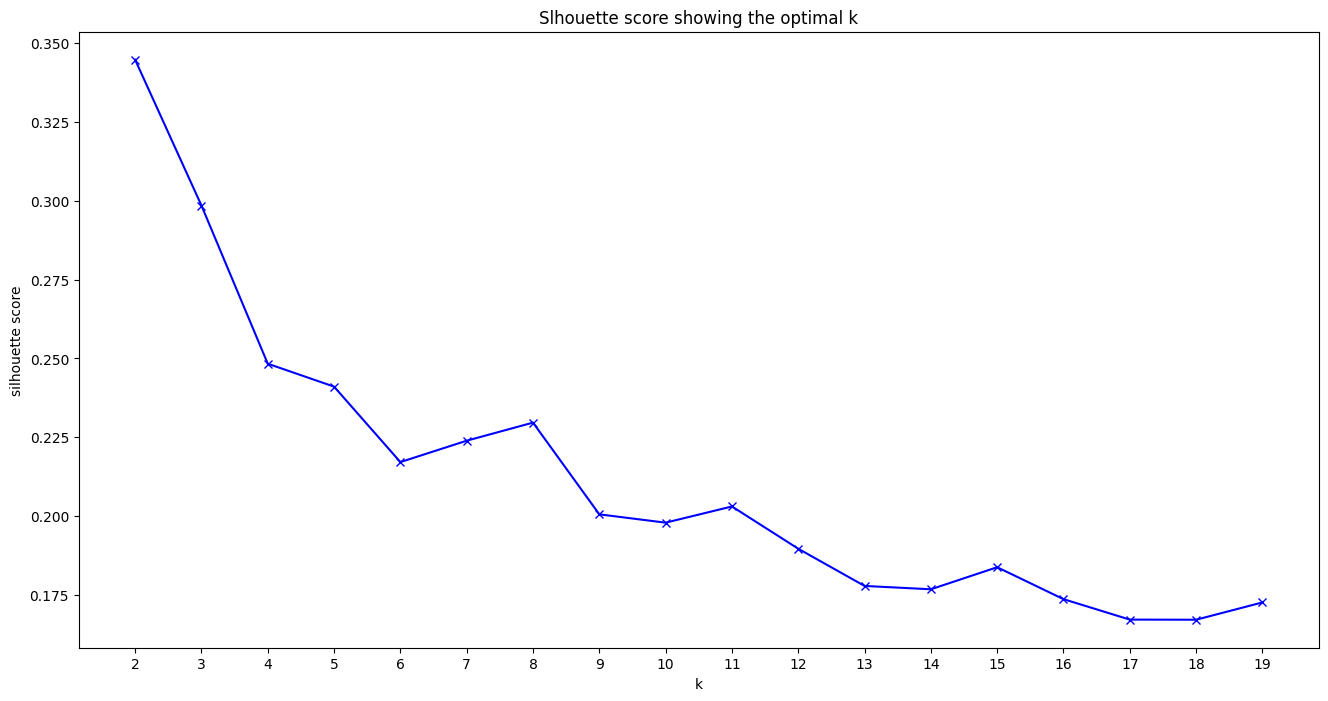

In [9]:
# Class code
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

%matplotlib inline
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')


from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []
for k in K:
    kmeans = KMeans(n_clusters=k,
    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))
plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

# Clustering
I think 5 is close to the elbow and it's also close to a silhouette local max so I'll take that value instead.

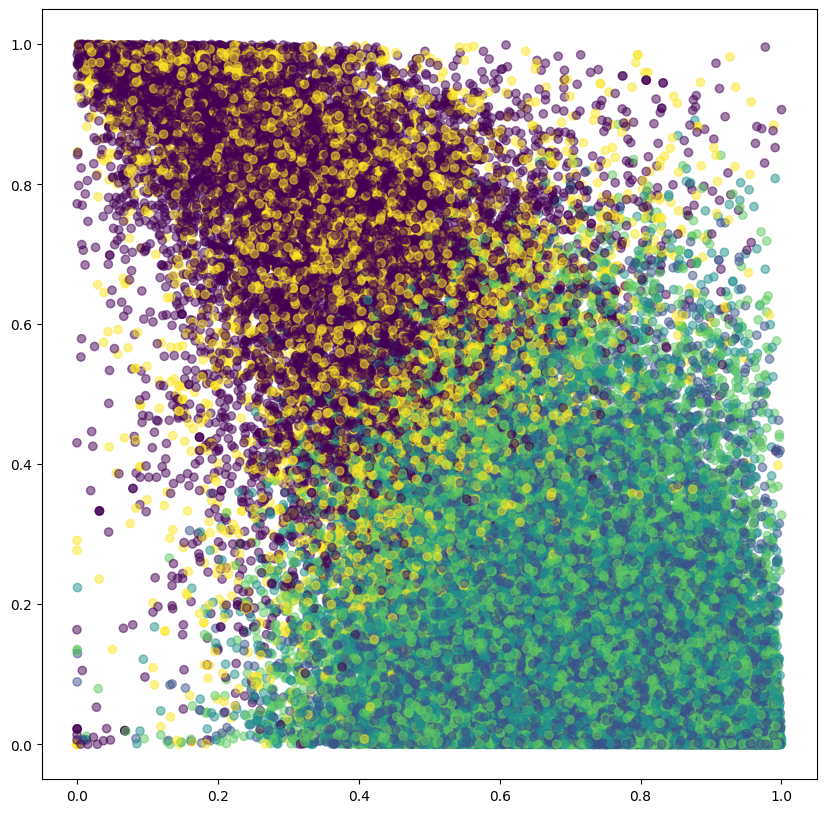

CPU times: user 7.84 s, sys: 2.51 s, total: 10.3 s
Wall time: 3.18 s


In [10]:
%%time
nclusters = 5

kmeans = cluster.KMeans(n_clusters=nclusters)
kmeans.fit(X_prep)
pred = kmeans.predict(X_prep)
plt.figure(figsize=(10, 10))
plt.scatter(X_prep.loc[:, 'energy'], X_prep.loc[:, 'acousticness'], c=pred,alpha=0.5)
plt.show()

# Saving to dataframe

In [11]:
data['cluster'] = pred
data

,title,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,cluster
0,Hits 2020 - Mashup,"Trinix Remix, Trinix",spotify:track:45v4pDxE0VuSZOx81FtgBS,0.510,0.709,1.0,-7.194,0.0,0.1620,0.12800,...,0.0653,0.6620,142.510,audio_features,45v4pDxE0VuSZOx81FtgBS,https://api.spotify.com/v1/tracks/45v4pDxE0VuS...,https://api.spotify.com/v1/audio-analysis/45v4...,133591.0,5.0,1
1,As It Was,Harry Styles,spotify:track:4LRPiXqCikLlN15c3yImP7,0.520,0.731,6.0,-5.338,0.0,0.0557,0.34200,...,0.3110,0.6620,173.930,audio_features,4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303.0,4.0,1
2,About Damn Time,Lizzo,spotify:track:1PckUlxKqWQs3RlWXVBLw3,0.836,0.743,10.0,-6.305,0.0,0.0656,0.09950,...,0.3350,0.7220,108.966,audio_features,1PckUlxKqWQs3RlWXVBLw3,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822.0,4.0,1
3,Alone Again,The Weeknd,spotify:track:2geUtMB7UX968R11pCoXbU,0.256,0.653,6.0,-7.972,0.0,0.0544,0.03370,...,0.1680,0.0581,90.673,audio_features,2geUtMB7UX968R11pCoXbU,https://api.spotify.com/v1/tracks/2geUtMB7UX96...,https://api.spotify.com/v1/audio-analysis/2geU...,250057.0,5.0,1
4,Too Late,The Weeknd,spotify:track:6BSAGCfWNAlx4dVlvxx9UT,0.640,0.869,4.0,-5.179,0.0,0.1170,0.05180,...,0.6910,0.1850,120.070,audio_features,6BSAGCfWNAlx4dVlvxx9UT,https://api.spotify.com/v1/tracks/6BSAGCfWNAlx...,https://api.spotify.com/v1/audio-analysis/6BSA...,239980.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83722,Sunny Afternoon,Red Velvet,spotify:track:3G6iqKcRzEYwSu9zE2qAMW,0.747,0.841,4.0,-3.648,0.0,0.0787,0.08440,...,0.3800,0.6050,95.028,audio_features,3G6iqKcRzEYwSu9zE2qAMW,https://api.spotify.com/v1/tracks/3G6iqKcRzEYw...,https://api.spotify.com/v1/audio-analysis/3G6i...,240405.0,4.0,1
83723,Fool,Red Velvet,spotify:track:21C7B7PWYDW00czamOjleO,0.634,0.699,1.0,-3.898,1.0,0.1090,0.52700,...,0.0673,0.7740,177.941,audio_features,21C7B7PWYDW00czamOjleO,https://api.spotify.com/v1/tracks/21C7B7PWYDW0...,https://api.spotify.com/v1/audio-analysis/21C7...,233540.0,4.0,2
83724,Some Love,Red Velvet,spotify:track:5n8SuNZuDaElJQMt0ySzCf,0.744,0.907,7.0,-3.154,1.0,0.0567,0.06490,...,0.2720,0.7460,99.988,audio_features,5n8SuNZuDaElJQMt0ySzCf,https://api.spotify.com/v1/tracks/5n8SuNZuDaEl...,https://api.spotify.com/v1/audio-analysis/5n8S...,196818.0,4.0,3
83725,My Dear,Red Velvet,spotify:track:6s25gIYsBc8oF0VQFK7wzt,0.550,0.798,6.0,-2.681,1.0,0.1310,0.32700,...,0.0905,0.8470,201.965,audio_features,6s25gIYsBc8oF0VQFK7wzt,https://api.spotify.com/v1/tracks/6s25gIYsBc8o...,https://api.spotify.com/v1/audio-analysis/6s25...,214842.0,4.0,3


# Recommending new song

In [14]:
# Reading the top songs from the first lab
songs = pd.read_csv('../data/top_songs.csv')

In [15]:
songs

,index,title,singers,genre,from
0,1,Unholy,"Sam Smith,Kim Petras",Pop,international
1,2,Face It Alone,Queen,Rock,international
2,3,I'm Good (Blue),"David Guetta,Bebe Rexha",Dance,international
3,4,Thank God,"Kane Brown,Katelyn Brown",Country,international
4,5,wait in the truck,"HARDY,Lainey Wilson",Country,international
...,...,...,...,...,...
1799,89,This Is Why,Paramore,Alternative,United Kingdom (UK)
1800,92,Believer,Imagine Dragons,Alternative,United Kingdom (UK)
1801,93,Getting Started,Sam Fender,"Singer,Songwriter",United Kingdom (UK)
1802,95,KILL DEM,Jamie xx,Electronic,United Kingdom (UK)


In [16]:
def recommend_song(record):
    # Recommends a song from the dataframe with the same author or genre
    
    # first I check if the song is in the top 100
    if record in songs['title'].values:
        
        # I create an empty dataframe for recommendations
        recommendations = pd.DataFrame()
        # I get the list of artists from the song
        record_artists = songs[songs['title']==record]['singers']
        # I get the list of genres from the song
        record_genres = songs[songs['title']==record]['genre']
        
        # For every artist in my list of artists
        for artist in record_artists.values[0].split(','):
            # I add to my recommendations everything with this artist
            recommendations = pd.concat([recommendations,songs[songs['singers'].str.split(',').apply(lambda x: any([artist == singer for singer in x]))]],axis=0)

            # For every genre in my list of genres
        for genre in record_genres.values[0].split(','):
            # I add to my recommendations everything containing this genre
            recommendations = pd.concat([recommendations,songs[songs['genre'].str.split(',').apply(lambda x: any([genre == genero for genero in x]))]],axis=0)               
        # dropping duplicates because my code can easily create them if they share artist and genre
        recommendations= recommendations.drop_duplicates(subset=['title'])
        
        # Dropping the record we were given because we don't want to recommend the same song
        recommendations = recommendations[recommendations['title']!=record]

        chosen_one = recommendations.iloc[np.random.randint(0,high=len(recommendations))]
        # Returning a random value
        print('We recommend you the song number '+str(chosen_one['index'])+' from the '+chosen_one['from']+' TOP 100 charts:')
        return chosen_one[['title','genre','singers']]
        
    else:
        # reading record_data from spotipy
        record_data = sp.search(q=record, limit=1)['tracks']['items'][0]
        
        #reading audio features from this one
        record_features = sp.audio_features(record_data['uri'])[0]
        
        # Creating a 1-line dataframe with the record data
        record_pd = pd.DataFrame()
        for feature in record_features:
            record_pd.loc[0,feature] = record_features[feature]
            
        # Dropping columns
        record_pd =  record_pd.drop(['type','id','uri','track_href', 'analysis_url'],axis=1)        
        
        # Using old minmaxer
        record_pd_ready = transformer.transform(record_pd)
        record_pd_ready = pd.DataFrame(record_pd_ready, columns=record_pd.columns)
        

        # Predicting
        cluster = kmeans.predict(record_pd_ready)[0]

        # I create an empty dataframe for recommendations
        recommendations = data[data['cluster']==cluster].reset_index(drop=True)
        chosen_one = recommendations.iloc[np.random.randint(0,high=len(recommendations))]
        print('We recommend you this similar song: '+str(chosen_one['title'])+' by '+chosen_one['artist']+'.')
        return chosen_one[['title','artist']]
        

In [22]:
recommend_song("La persona amaia")

We recommend you this similar song: It's Love by Kina Grannis.


title        It's Love
artist    Kina Grannis
Name: 7734, dtype: object